##### Activity 14.01

This is the data set for for the activity


https://archive.ics.uci.edu/ml/machine-learning-databases/00360/

In [ ]:
import pandas as pd
from dateutil.parser import parse

In [ ]:
filePath = '/content/drive/MyDrive/Packt_Colab/pandas_chapter11/chapter11/AirQualityUCI.csv'

In [ ]:

data = pd.read_csv(filePath,delimiter=";")
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:

data = data.drop(['Unnamed: 15','Unnamed: 16'],axis=1)
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [ ]:
data.shape

(9471, 15)

In [ ]:
data = data.dropna()
data.shape

(9357, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [ ]:
# Parsing the date
data['Parse_date'] = data['Date'].apply(lambda x: parse(x))
# Parsing the weekday
data['Weekday'] = data['Parse_date'].apply(lambda x: x.weekday())
# Parsing the Day
data['Day'] = data['Parse_date'].apply(lambda x: x.strftime("%A"))
# Parsing the Month
data['Month'] = data['Parse_date'].apply(lambda x: x.strftime("%B"))
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Parse_date,Weekday,Day,Month
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-10-03,6,Sunday,October
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-10-03,6,Sunday,October
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-10-03,6,Sunday,October
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-10-03,6,Sunday,October
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-10-03,6,Sunday,October


##### Question 1 : Which day of the week has the highest NO2(GT) emissions

In [ ]:

Q1_1 = pd.DataFrame(data.groupby(['Day'])['NO2(GT)'].agg('mean'))
Q1_1


,NO2(GT)
Day,
Friday,70.924851
Monday,65.771155
Saturday,58.110340
Sunday,50.844978
Thursday,52.760417
Tuesday,48.289394
Wednesday,60.279545


Text(0, 0.5, 'Average Emissions')

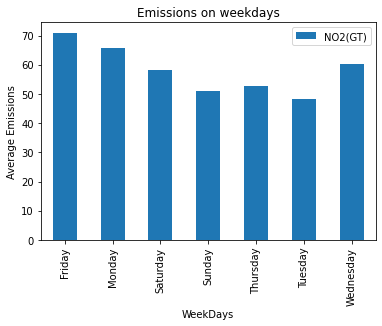

In [ ]:

DayPlot = Q1_1.plot.bar(y='NO2(GT)',rot=90,title = 'Emissions on weekdays')

DayPlot.set_xlabel("WeekDays")
DayPlot.set_ylabel("Average Emissions")

##### Question 2 : Which time of the day is NHMC(GT) emissions highest

In [ ]:

Q2_1 = pd.DataFrame(data.groupby(['Time'])['NMHC(GT)'].agg('mean'))


    

Text(0, 0.5, 'Hours')

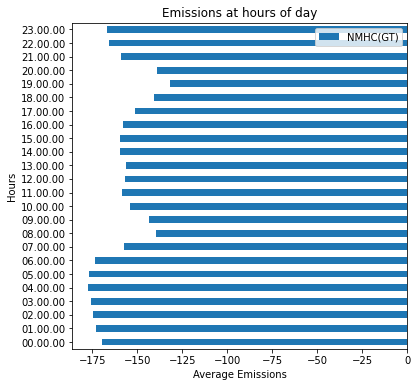

In [ ]:

timePlot = Q2_1.plot.barh(y= 'NMHC(GT)',title = 'Emissions at hours of day',figsize=(6,6))

timePlot.set_xlabel("Average Emissions")
timePlot.set_ylabel("Hours")

##### Question 3 : Which month are the CO(GT) emissions highest

In [ ]:
# Creating the function to clean
def cleanFeat(x):
    return pd.to_numeric(".".join(x.split(',')))

In [ ]:
# Cleaning up the CO format
data['CO(GT)'] = data['CO(GT)'].apply(lambda x: cleanFeat(x))
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Parse_date,Weekday,Day,Month
0,10/03/2004,18.00.00,2.6,1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-10-03,6,Sunday,October
1,10/03/2004,19.00.00,2.0,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-10-03,6,Sunday,October
2,10/03/2004,20.00.00,2.2,1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-10-03,6,Sunday,October
3,10/03/2004,21.00.00,2.2,1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-10-03,6,Sunday,October
4,10/03/2004,22.00.00,1.6,1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-10-03,6,Sunday,October


In [ ]:

Q3_1 = pd.DataFrame(data.groupby(['Month'])['CO(GT)'].agg('mean'))
Q3_1

,CO(GT)
Month,
April,-72.784898
August,-61.484274
December,-37.215495
February,-18.839943
January,-17.982552
July,-53.468952
June,-9.092500
March,-19.758170
May,-38.836290


Text(0, 0.5, 'Months')

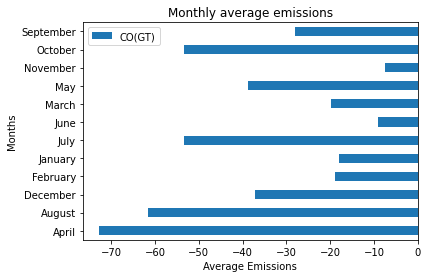

In [ ]:

monthPlot = Q3_1.plot.barh(y= 'CO(GT)',title = 'Monthly average emissions')

monthPlot.set_xlabel("Average Emissions")
monthPlot.set_ylabel("Months")